In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import corner, os, glob, json
import numpy as np
import pandas as pd
import astropy.units as u
%matplotlib inline

# Directories

In [4]:
#Reference directory
topdir = os.getcwd()

In [8]:
datadir_V1 = topdir + '/SimInject1/SimRuns'
datadir_V2 = topdir + '/SimInject2/SimRuns'

#Two GWB powerlaws
run_3_dir = datadir_V1 + '/simGWB_V1_3'
run_4_dir = datadir_V2 + '/simGWB_V2_1'

# Load Chains

In [9]:
#Load chains for run 3
chain_run_3 = pd.read_csv(run_3_dir + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_run_3 = int(0.25 * chain_run_3.shape[0])

In [10]:
#Load chains for run 4
chain_run_4 = pd.read_csv(run_4_dir + '/chain_1.txt', sep='\t', dtype=float, header=None).values
burn_run_4 = int(0.25 * chain_run_4.shape[0])

# Load Parameter Files

In [11]:
#Load param files to iterate through pulsars in pta
with open(run_3_dir + '/parameters.json') as pf:
    param_dict_run_3 = json.load(pf)
    pf.close()

In [12]:
#Load param files to iterate through pulsars in pta
with open(run_4_dir + '/parameters.json') as pf:
    param_dict_run_4 = json.load(pf)
    pf.close()

# Plot Histograms

In [13]:
#display all histograms for particular parameter (ie. red_noise_log10_A)
def draw_histograms(data, labels, indices,figsize=(10,5)):
    #Takes in data (chain, already burned), labels (parameters), and indices of parameters we want to look at
    n_cols = 2
    n_rows = int(len(indices)/n_cols)
    n_bins = 30
    fig,axarr =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=figsize)
    ii = 0
    if n_rows == 1:
        for j in range(n_cols):
            axarr[j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
            axarr[j].set_xlabel(labels[indices[ii]])
            ii += 1
    else:    
        for i in range(n_rows):
            for j in range(n_cols):
                axarr[i][j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
                axarr[i][j].set_xlabel(labels[indices[ii]])
                ii += 1
    fig.tight_layout()
    plt.show()

In [18]:
indices = [len(param_dict_run_3)-2, len(param_dict_run_3)-1]
print(param_dict_run_3[indices[0]])

zlog10_A_gw


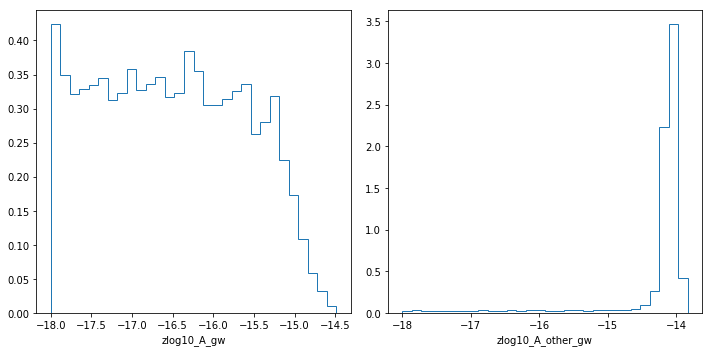

In [19]:
draw_histograms(chain_run_3[burn_run_3:],param_dict_run_3,indices)

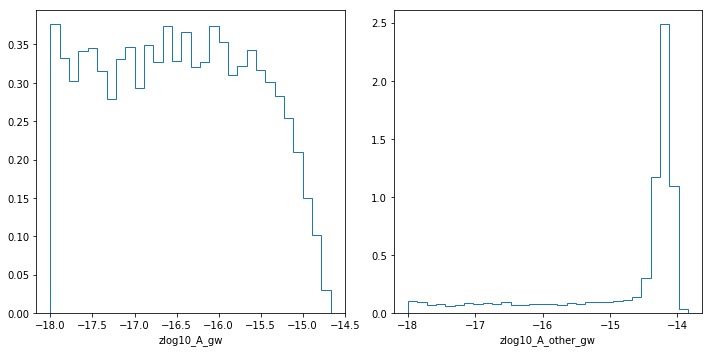

In [20]:
draw_histograms(chain_run_4[burn_run_4:],param_dict_run_4,indices)

In [21]:
pulsar_indices_3 = range(0,len(param_dict_run_3)-2)
pulsar_indices_3 = []
for i,param in enumerate(param_dict_run_3):
    if 'red' in param.strip('_'):
        pulsar_indices_3.append(i)

In [22]:
pulsar_indices_4 = range(0,len(param_dict_run_4)-2)
pulsar_indices_4 = []
for i,param in enumerate(param_dict_run_4):
    if 'red' in param.strip('_'):
        pulsar_indices_4.append(i)

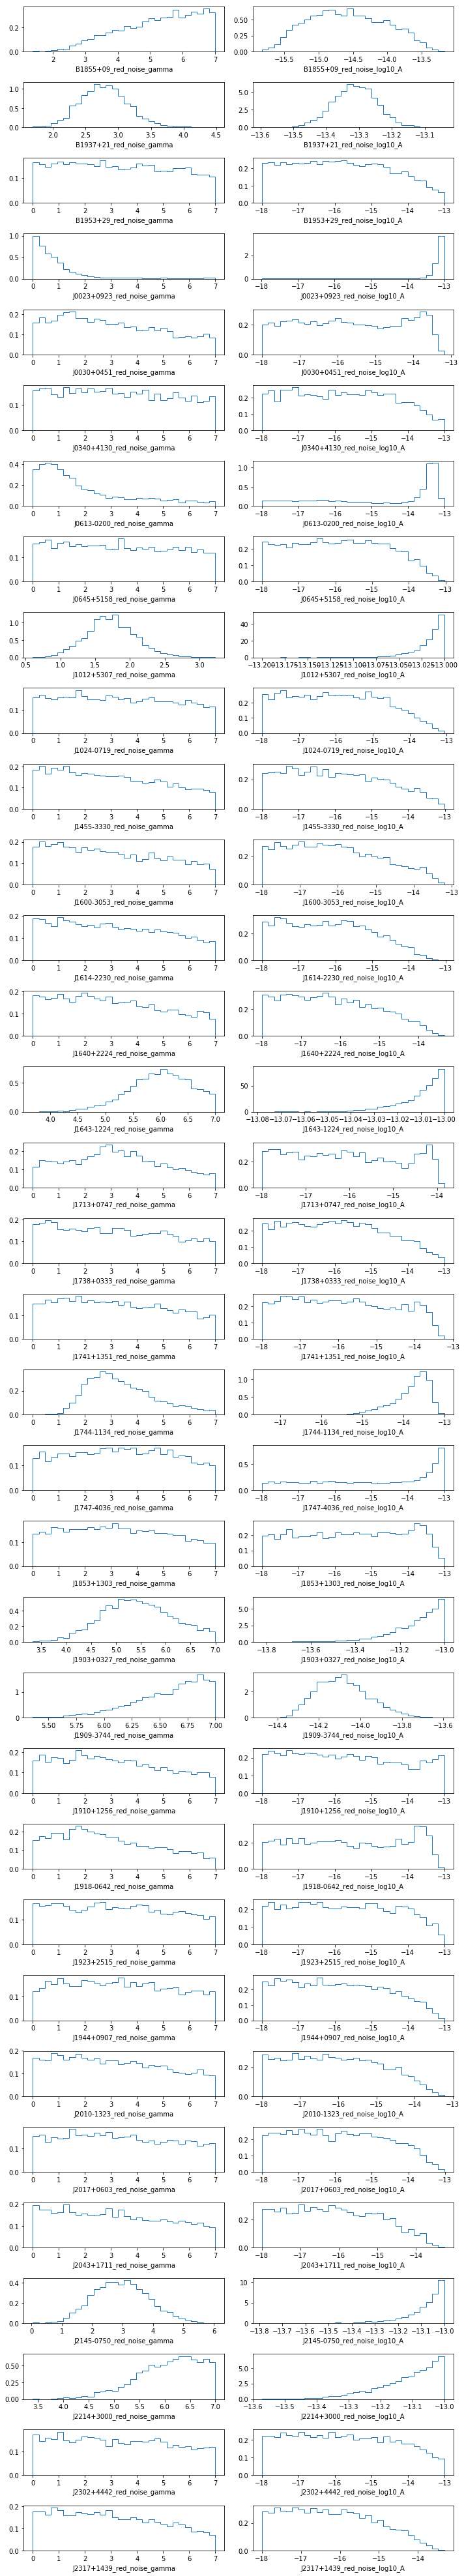

In [23]:
draw_histograms(chain_run_3[burn_run_3:],param_dict_run_3,pulsar_indices_3,figsize=(10,55))

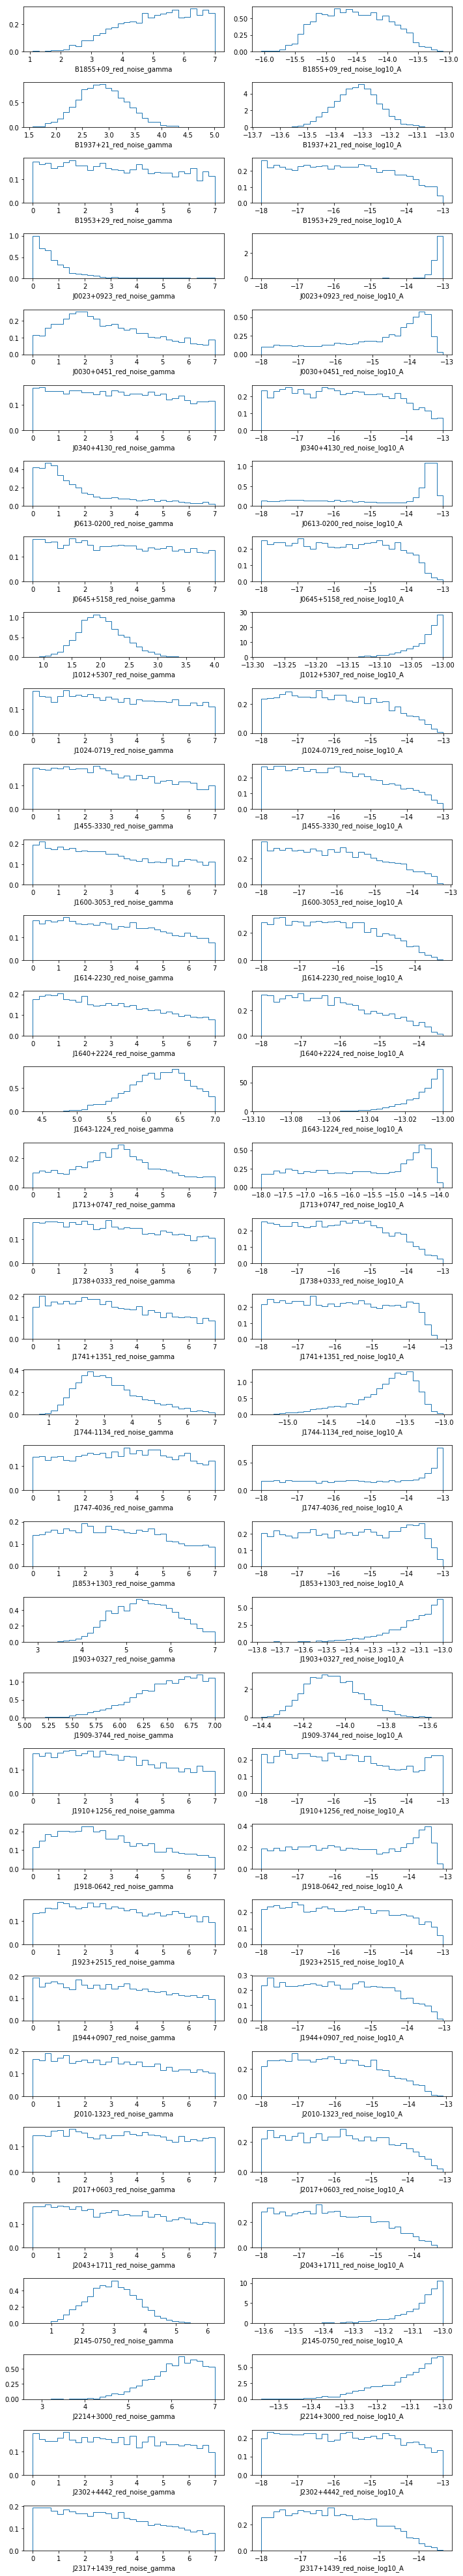

In [24]:
draw_histograms(chain_run_4[burn_run_4:],param_dict_run_4,pulsar_indices_4,figsize=(10,55))

# Trace Plots

In [25]:
#display all histograms for particular parameter (ie. red_noise_log10_A)
def draw_trace(data, labels, indices):
    #Takes in data (chain, already burned), labels (parameters), and indices of parameters we want to look at
    n_cols = 2
    n_rows = int(len(indices)/n_cols)
    fig,axarr =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(10,5))
    ii = 0
    if n_rows == 1:
        for j in range(n_cols):
            axarr[j].plot(data[:,indices[ii]])
            axarr[j].set_ylabel(labels[indices[ii]])
            ii += 1
    else:    
        for i in range(n_rows):
            for j in range(n_cols):
                axarr[i][j].plot(data[:,indices[ii]])
                axarr[i][j].set_ylabel(labels[ii])
                ii += 1
    fig.tight_layout()
    plt.show()

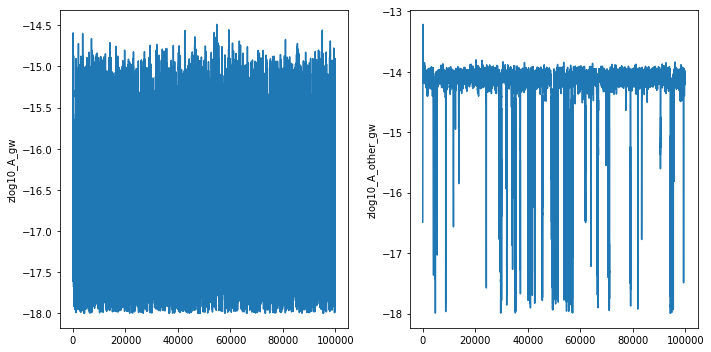

In [26]:
draw_trace(chain_run_3,param_dict_run_3,indices)

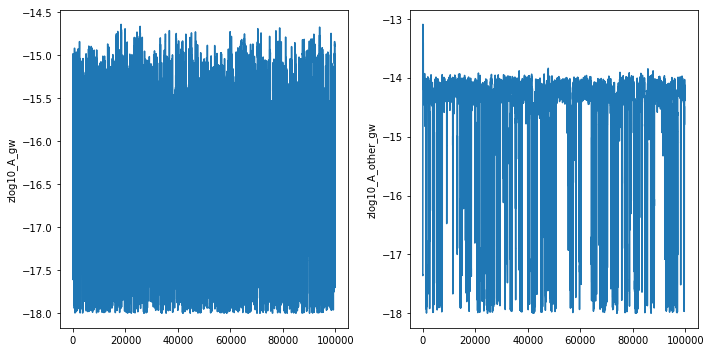

In [27]:
draw_trace(chain_run_4,param_dict_run_4,indices)

In [31]:
injection_gwb_A = 5.0e-15
injection_gwb_gamma = 13/3

injection_other_A = 1.0e-15
injection_other_gamma = 7/3

print(np.log10(injection_gwb_A))
print(np.log10(injection_other_A))

truths = [np.log10(injection_gwb_A),np.log10(injection_other_A)]

-14.301029995663981
-15.0


In [32]:
flow = np.log10(1/20/u.yr.to('s'))
fhigh = np.log10(1/2/u.wk.to('s'))
nfreqs = 1000
f = np.logspace(flow,fhigh,nfreqs)*u.Hz
fyear = 1/u.yr
fyear = fyear.to('1/s')

h_gwb = injection_gwb_A*(f/fyear)**(-.5*(injection_gwb_gamma-3))
h_other = injection_other_A*(f/fyear)**(-.5*(injection_other_gamma-3))

intersect = (injection_gwb_A/injection_other_A)*fyear

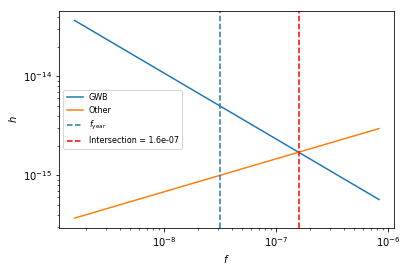

In [33]:
plt.figure()
plt.loglog(f,h_gwb,label='GWB')
plt.loglog(f,h_other,label='Other')
plt.axvline(x=fyear.value,linestyle='--',label=r'$f_{\rm year}$')
plt.axvline(x=intersect.value,color='r',linestyle='--',label='Intersection = %.1e' %intersect.value)
plt.legend(loc='center left',fontsize = 8)
plt.ylabel(r'$h$')
plt.xlabel(r'$f$')
plt.show()

In [34]:
def CornerPlots(chain,burn,indices,params,truths):
    param_labels = []
    for index in indices:
        param_labels.append(params[index])
    corner.corner(chain[burn:,indices], bins = 30, labels = param_labels, truths=truths)

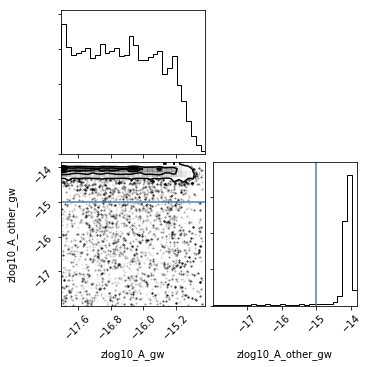

In [35]:
CornerPlots(chain_run_3,burn_run_3,indices,param_dict_run_3,truths)

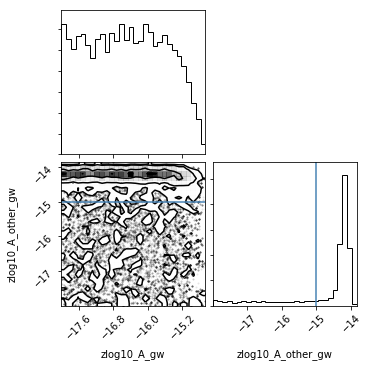

In [36]:
CornerPlots(chain_run_4,burn_run_4,indices,param_dict_run_4,truths)